# How to create a gif

In the following, we want to create an animation of the function $f(x,t) = A(t) \cos(x)$ whose amplitude changes with time $t$.
For this, we need to import:

1. numpy for basic mathematics

2. matplotlib.pyplot to visualize the function

3. PillowWriter from the matplotlib.animation library to create a gif file

In [1]:
# for numerics and algebra
import numpy as np
# for plotting the data
import matplotlib.pyplot as plt
# for creating a gif
from matplotlib.animation import PillowWriter

We define the amplitude function $A(t) = C \sin(\nu t)$ and the function $f(x,t)$ that we wish to see animated. Here, $\nu$ is the oscillation frequency in Hz and $C$ is a constant amplitude overall stretching factor of the amplitude function.

In [2]:
def A(c,nu,t):
    return c * np.sin(2*np.pi*nu*t)

In [3]:
# data to plot, we will generate the data by a function
def f(c,nu,x,t):
    return A(c,nu,t)*np.cos(x)

We wish to draw the function over a certain range of values $x \in [-20,20]$ with 1000 points at three different times $t \in \{ 0, 0.3, 0.6 \}$ in seconds. We choose the stretching factor $C = 1$ and the frequency $\nu = 1$ Hz. 

In [4]:
# numpy array that contains the x-values. The more points the smoother. 
x = np.linspace(-20,20,1000)
# create a list that contains the evaluation of the function at three times
data = [f(1,1,x,0), f(1,1,x,0.3), f(1,1,x,0.6)]

Let us have a look at the three instances in time:

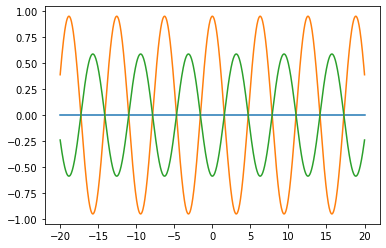

In [5]:
# plot everything in one figure
for k in range(len(data)):
    plt.plot(x,data[k])
    
plt.show()

In order to create a smooth animation, we need to evaluate $f(x,t)$ at many times $t$. We choose 50 points in a 2-seconds interval.

In [6]:
# create 50 values between 0 and 2 seconds
times = np.linspace(0,2,50)

# create a numpy array that will contain all function evaluations over all times and initialize it with zeros
dimensions = len(x),len(times)
data_times = np.zeros(dimensions)

# fill the above 2D array 'data_times' with the y-values for all times
for i_time in range(0,len(times)):
    t = times[i_time]
    data_times[:,i_time] = f(1,1,x,t)

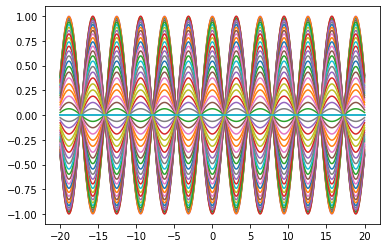

In [7]:
# plot all curves for different times in one plot
for i_time in range(0,len(times)):
    plt.plot(x,data_times[:,i_time])
    
plt.show()

# Creating the gif

We now wish to create an animated gif file from each time value for which we computed our function.
We want 25 frames per seconds (fps), which perfectly fits our 50 time values over a 2-second period.
Therefore, our final animation with last 2 seconds.

In [8]:
# meta data that will appear in the header of the gif file
my_meta_info = dict(title='standing wave', artist='swc')
# PillowWriter is most appropriate for gif
writer = PillowWriter(fps = 25, metadata = my_meta_info)

The gif-file standing_wave.gif was created!


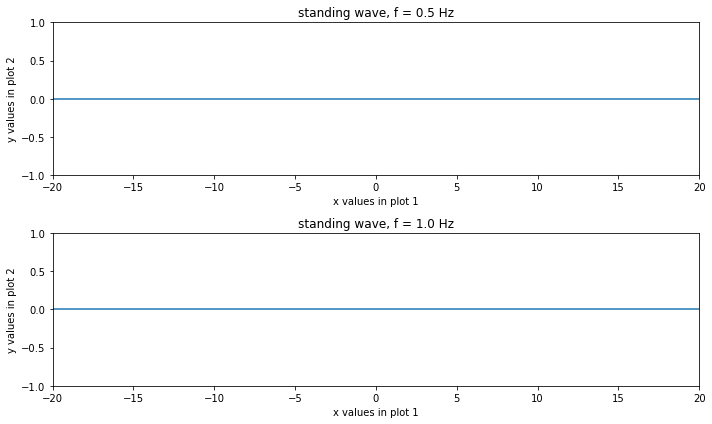

In [9]:
# Wefine the ingredients for a nice plot like axis labels.
# We wish to animate the function twice, for the frequencies f = 0.5 Hz and f = 1 Hz. 

# create a list of x- and y-labels, and titles for our subplots
x_labels = ['x values in plot 1','x values in plot 1']
y_labels = ['y values in plot 2','y values in plot 2']
titles = ['standing wave, f = 0.5 Hz','standing wave, f = 1.0 Hz']

fig, axes = plt.subplots(figsize=(10.0, 6.0), nrows=2)

for k in range(len(x_labels)):
    axes[k].set_xlabel( x_labels[k] )
    axes[k].set_ylabel( y_labels[k] )
    axes[k].set_xlim(x[0], x[-1])
    axes[k].set_ylim(-1,1)
    axes[k].set_title(titles[k])

fig.tight_layout()

# until here the code is similar to the plotting into a single figure.

# Now: create two empty frames that will later contain the function at the two frequencies
panel1, = axes[0].plot([],[])
panel2, = axes[1].plot([],[])

name_of_my_gif = 'standing_wave.gif'
resolution = 100 # in dpi (dots per inch, i.e., the resolution/quality)

with writer.saving(fig, name_of_my_gif, resolution):
    # for each time, we want to update the empty plot
    for t in times:
        # update the data that is shown in each of the two panels
        panel1.set_data( x , f(1,0.5,x,t) )
        panel2.set_data( x , f(1,1,x,t) )
        writer.grab_frame() # this line grabs the figure and attaches it to our gif

print('The gif-file',name_of_my_gif,'was created!')

# How to create a video file

For practical purposes, it might be more useful to create a video. Videos can be stopped at any moment and provide a slider to move back and forth in the video. 
This is basically the same code that we used for the gif, we only change the writer to from PillowWriter to FFMpegWriter.
We also need to download the file ffmpeg (https://ffmpeg.org/download.html) and tell the program where it can find it.

The mp4-file standing_wave.mp4 was created!


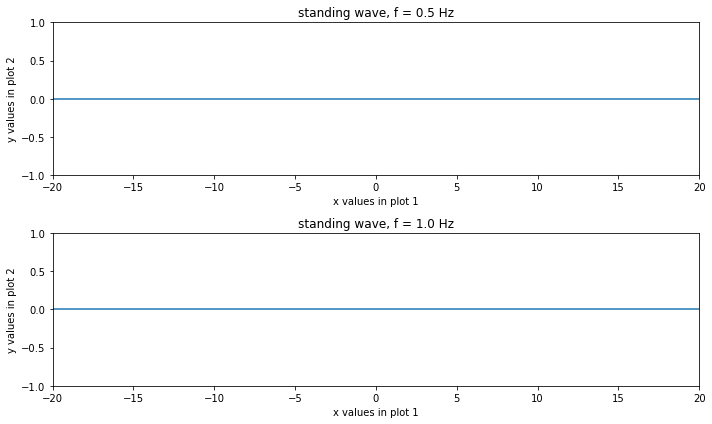

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Tell the program where to find it: Change to reflect your complete file location!
plt.rcParams['animation.ffmpeg_path'] = '/Users/raffaelklees/PYTHON/jupyter_notebook/carpentry/03_animations_in_python_by_raffael/ffmpeg'

# data to plot, we will generate the data by a function
def f(c,nu,x,t):
    return c * np.sin(2*np.pi*nu*t) * np.cos(x)

# same as before
x = np.linspace(-20,20,1000)
times = np.linspace(0,2,50)

# meta data as before
my_meta_info = dict(title='standing wave', artist='swc')
writer = FFMpegWriter(fps = 25, metadata = my_meta_info)

# create a list of x- and y-labels, and titles for our subplots
x_labels = ['x values in plot 1','x values in plot 1']
y_labels = ['y values in plot 2','y values in plot 2']
titles = ['standing wave, f = 0.5 Hz','standing wave, f = 1.0 Hz']

fig, axes = plt.subplots(figsize=(10.0, 6.0), nrows=2)

for k in range(len(x_labels)):
    axes[k].set_xlabel( x_labels[k] )
    axes[k].set_ylabel( y_labels[k] )
    axes[k].set_xlim(x[0], x[-1])
    axes[k].set_ylim(-1,1)
    axes[k].set_title(titles[k])

fig.tight_layout()

# create two empty frames that will contain the function at the two frequencies
panel1, = axes[0].plot([],[])
panel2, = axes[1].plot([],[])

name_of_my_video = 'standing_wave.mp4'
resolution = 100 # in dpi

with writer.saving(fig, name_of_my_video, resolution):
    for t in times:
        panel1.set_data( x , f(1,0.5,x,t) )
        panel2.set_data( x , f(1,1,x,t) )
        writer.grab_frame()
        
print('The mp4-file',name_of_my_video,'was created!')